In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
! pip install -q mlflow

%matplotlib inline

In [2]:
import mlflow
import mlflow.sklearn
from mlflow import MlflowClient
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


In [3]:
imputer=SimpleImputer(strategy="most_frequent")

In [6]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv", na_values={"null","?"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_15516\1172494880.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)


In [9]:
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [10]:
df["Loan_Amount_Term"]=imputer.fit_transform(df[["Loan_Amount_Term"]])
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(),inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_15516\2223138656.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
C:\Users\youss\AppData\Local\Temp\ipykernel_15516\2223138656.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [11]:
imputer.statistics_

array([360.])

In [12]:
df["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df.dropna(axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df.replace(["Male","Female"],[1,0],inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_15516\1040757557.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(["Male","Female"],[1,0],inplace=True)


In [17]:
df.head(30)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y
1,LP001003,1,Yes,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N
2,LP001005,1,Yes,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
3,LP001006,1,Yes,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y
4,LP001008,1,No,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
5,LP001011,1,Yes,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban,Y
6,LP001013,1,Yes,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban,Y
7,LP001014,1,Yes,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban,N
8,LP001018,1,Yes,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban,Y
9,LP001020,1,Yes,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,N


In [18]:
df.replace(["Yes","No"],[1,0],inplace=True)
df['Loan_Status'].replace({"Y":1 , "N":0},inplace=True)
df.replace(["Graduate","Not Graduate"],[1,0],inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_15516\3509986376.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(["Yes","No"],[1,0],inplace=True)
C:\Users\youss\AppData\Local\Temp\ipykernel_15516\3509986376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Status'].replace({"Y"

In [19]:
x=df.drop(["Loan_Status","Loan_ID","Property_Area"],axis=1)
y=df.Loan_Status
xtrain , xtest ,ytrain,ytest= train_test_split(x ,y ,random_state=40 ,test_size=0.3)

In [20]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.000000,360.0,1.0
610,1,1,1,0,4106,0.0,40.000000,180.0,1.0
611,1,1,1,0,8072,240.0,253.000000,360.0,1.0
612,1,1,1,0,7583,0.0,187.000000,360.0,1.0


In [21]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [24]:
import os
import time
import pandas as pd
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

2025/10/22 17:33:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/22 17:33:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'decisionTree' already exists. Creating a new version of this model...
2025/10/22 17:33:06 WARNING mlflow.tracking._model_registry.fluent: Run with id 839abaf87de34474a1f19b328a890acd has no artifacts at artifact path 'model', registering model based on models:/m-1f64bcafd5564de5a1b4d6fc1b64bf6a instead
2025/10/22 17:33:06 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: decisionTree, version 2
Created version '2' of model 'decisionTree'.


✅ Accuracy: 0.67
📦 Model registered as version: 2
🔁 Alias @dev now points to version: 2
🏃 View run Run for @dev at: http://127.0.0.1:5000/#/experiments/531803474937937342/runs/839abaf87de34474a1f19b328a890acd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/531803474937937342


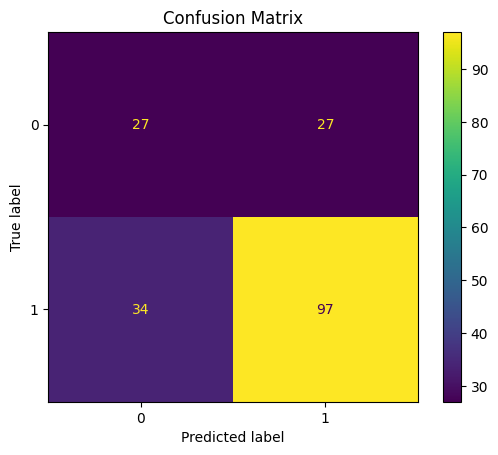

In [27]:
# 3. Set up MLflow and the Model Registry client
# 3.1 Set MLflow tracking server (make sure it's running locally)


# -----------------------------
# 1. Set up MLflow tracking
# -----------------------------
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# 2. Set or create experiment
mlflow.set_experiment("decisionTree")

# 3. Initialize MLflow client
client = MlflowClient()

# 4. Define model registry name and alias
model_name = "decisionTree"
alias_name = "dev"  # change to "staging" or "prod" as needed

# -----------------------------
# 5. Start MLflow Run
# -----------------------------
with mlflow.start_run(run_name=f"Run for @{alias_name}"):

    # Example training data (replace with your dataset)
    # Ensure xtrain, ytrain, xtest, ytest are already defined
    # xtrain, xtest, ytrain, ytest = ...

    # Train Decision Tree model
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(xtrain, ytrain)

    # Evaluate model performance
    preds = tree_clf.predict(xtest)
    acc = accuracy_score(ytest, preds)

    # -----------------------------
    # 6. Log Parameters and Metrics
    # -----------------------------
    mlflow.log_param("criterion", tree_clf.get_params().get("criterion"))
    mlflow.log_param("max_depth", tree_clf.get_params().get("max_depth"))
    mlflow.log_metric("accuracy", acc)

    # -----------------------------
    # 7. Log Model
    # -----------------------------
    mlflow.sklearn.log_model(tree_clf, artifact_path="model")

    # 8. Register model to MLflow Model Registry
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/model"
    result = mlflow.register_model(model_uri=model_uri, name=model_name)
    version = result.version

    # Wait until model is ready before assigning alias
    for _ in range(10):
        model_info = client.get_model_version(model_name, version)
        if model_info.status == "READY":
            break
        time.sleep(2)

    # Assign alias (e.g., @dev)
    client.set_registered_model_alias(
        name=model_name,
        alias=alias_name,
        version=version
    )

    # -----------------------------
    # 9. Log Dataset as Artifact
    # -----------------------------
    df = pd.DataFrame(xtrain, columns=[f"feature_{i}" for i in range(xtrain.shape[1])])
    df["target"] = ytrain
    dataset_path = "train_u6lujuX_CVtuZ9i (1).csv"
    df.to_csv(dataset_path, index=False)
    mlflow.log_artifact(dataset_path, artifact_path="dataset")

    # -----------------------------
    # 10. Log Notebook and Visuals
    # -----------------------------
    if os.path.exists("mlflow_sample_example.ipynb"):
        mlflow.log_artifact("mlflow_sample_example.ipynb", artifact_path="code")

    # Log confusion matrix image
    ConfusionMatrixDisplay.from_estimator(tree_clf, xtest, ytest)
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png", artifact_path="metrics")

    # -----------------------------
    # 11. Print Results
    # -----------------------------
    print(f"✅ Accuracy: {acc:.2f}")
    print(f"📦 Model registered as version: {version}")
    print(f"🔁 Alias @{alias_name} now points to version: {version}")

# End of MLflow run (context manager auto-closes)


In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(xtrain, ytrain)

print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    138.0  291.0       1.0      429.0         429.0
_______________________________________________
Confusion Matrix: 
 [[138   0]
 [  0 291]]

Test Result:
Accuracy Score: 67.03%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.442623    0.782258   0.67027    0.612441      0.683121
recall      0.500000    0.740458   0.67027    0.620229      0.670270
f1-score    0.469565    0.760784   0.67027    0.615175      0.675780
support    54.000000  131.000000   0.67027  185.000000    185.000000
_______________________________________________
Conf